# Exercise 6.6: Working with Time Series Analysis

Data Source: EIA State energy-related carbon dioxide emissions by year 
    https://www.eia.gov/environment/emissions/state/

## Table of Contents:

1. Importing Data and Libraries
2. Subsetting, Wrangling, and Cleaning Time Series Data
3. Decomposition
4. Testing for Stationarity
5. Testing for Autocorrelation
6.Stationarizing Time Series Data

## Importing Data and Libraries

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
from statsmodels.tsa.stattools import adfuller 
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings. Not relevent for analysts here.

plt.style.use('fivethirtyeight') # styling option for plots. 

In [166]:
#importing data using path shortcut

path1 = r'/Users/elysegross/Documents/Data Analytics/A6/'
df_annual_co2 = pd.read_csv(os.path.join(path1, 'Data', 'annual_co2_emissions_data.csv'))


In [167]:
df_annual_co2

,State,Year,Emissions (Million Metric Tons of CO2)
0,Alabama,1970.0,102.64
1,Alabama,1971.0,98.46
2,Alabama,1972.0,104.93
3,Alabama,1973.0,109.56
4,Alabama,1974.0,108.77
...,...,...,...
2596,Total of States,2017.0,5143.10
2597,Total of States,2018.0,5294.80
2598,Total of States,2019.0,5158.83
2599,NaN,NaN,NaN


## Subsetting, Wrangling, and Cleaning Time Series Data

#### Missing Values

In [168]:
# Looking for missing values

df_annual_co2.isnull().sum()

State                                     2
Year                                      2
Emissions (Million Metric Tons of CO2)    2
dtype: int64

In [169]:
#Dropping the 5 rows with no values

df_annual_co2.dropna(inplace = True)

In [170]:
# Confirming missing values are gone

df_annual_co2.isnull().sum()

State                                     0
Year                                      0
Emissions (Million Metric Tons of CO2)    0
dtype: int64

#### Data Types

In [171]:
df_annual_co2.dtypes

State                                      object
Year                                      float64
Emissions (Million Metric Tons of CO2)    float64
dtype: object

In [172]:
df_annual_co2['Year'].astype(int)

0       1970
1       1971
2       1972
3       1973
4       1974
        ... 
2594    2015
2595    2016
2596    2017
2597    2018
2598    2019
Name: Year, Length: 2599, dtype: int64

#### Duplicates

In [173]:
# Checking for duplicates.

df_annual_co2[df_annual_co2.duplicated()]

,State,Year,Emissions (Million Metric Tons of CO2)


There are no duplicates.

#### Creating a subset without state names

In [174]:
# Creating a subset of data only including the total emissions accross all US states.

df_co2_sub_states = df_annual_co2.loc[(df_annual_co2['State'] == 'Total of States')]
                                       

In [175]:
# Viewing the dataset created above.

df_co2_sub_states.head()

,State,Year,Emissions (Million Metric Tons of CO2)
2549,Total of States,1970.0,4254.53
2550,Total of States,1971.0,4299.69
2551,Total of States,1972.0,4519.66
2552,Total of States,1973.0,4716.60
2553,Total of States,1974.0,4545.40


I decided to take this subset because running time series analysis on every state would be unnecessary for this analysis. Though, it might be interesting to look at this data further in another aspect.

In [176]:
# Creating a subset without the 'Total of States' label in each line (removing column).

df_co2_sub = df_co2_sub_states[['Year', 'Emissions (Million Metric Tons of CO2)']]

In [177]:
# Viewing subset created above

df_co2_sub.head()

,Year,Emissions (Million Metric Tons of CO2)
2549,1970.0,4254.53
2550,1971.0,4299.69
2551,1972.0,4519.66
2552,1973.0,4716.60
2553,1974.0,4545.40


In [178]:
# Making year the index.

df_co2_sub = df_co2_sub.set_index('Year')

In [179]:
# Making sure the above worked.

df_co2_sub.head()

,Emissions (Million Metric Tons of CO2)
Year,
1970.0,4254.53
1971.0,4299.69
1972.0,4519.66
1973.0,4716.60
1974.0,4545.40


## Decomposition

In [186]:
# Decomposing the data set

decomposition = sm.tsa.seasonal_decompose(df_co2_sub, model='additive', freq=5)


In [187]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

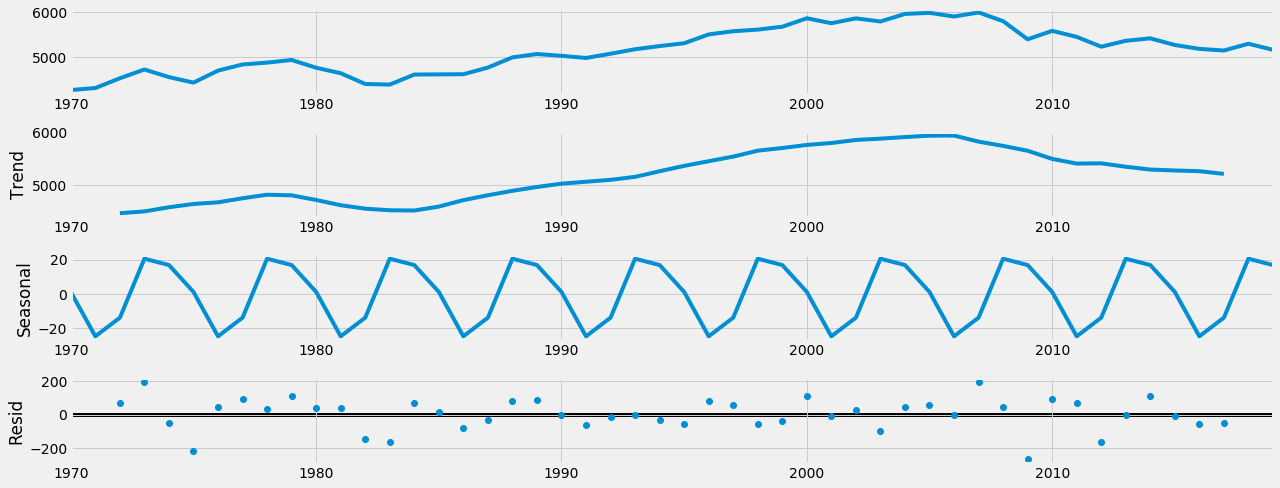

In [188]:
# Plot the separate components

decomposition.plot()
plt.show()

In this decomposition of the data, I see that there is seasonality, though the trend is not very strong. Also, there is a bit of noise, as seen in the bottom plot.

## Testing for Stationarity

In [192]:
# Use the Dickey-Fuller test to test for stationarity.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Applying test using the newly created function on the time series
dickey_fuller(df_co2_sub['Emissions (Million Metric Tons of CO2)'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.267918
p-value                         0.643719
Number of Lags Used             8.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


From the Dickey-Fuller test, I see that I cannot reject the null hypothesis (which is that this is not a stationary data set). So, this is non-stationary.

## Testing for Autocorrelations

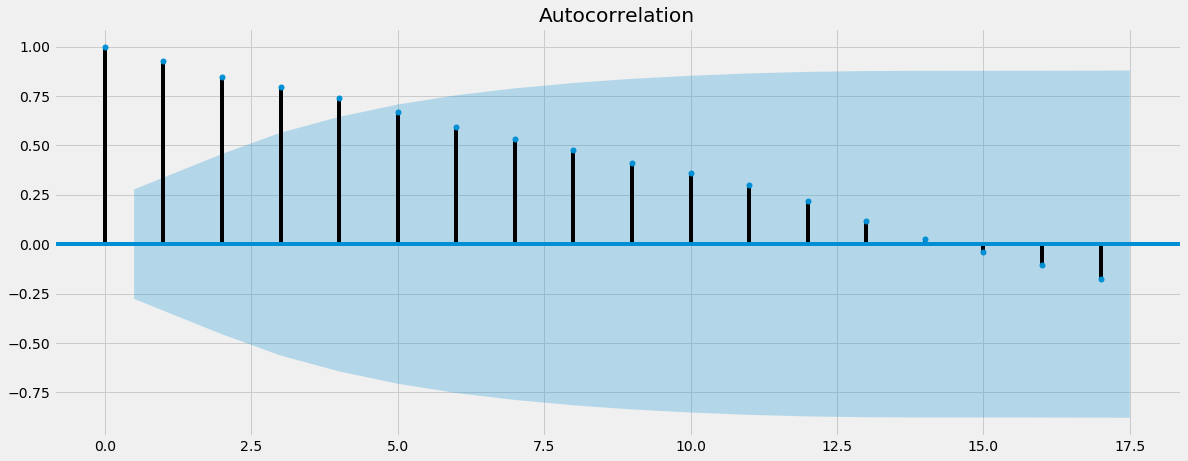

In [193]:
# Checking for autocorrelations

# Importing library needed for this:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_co2_sub)
plt.show()

This showed me that the data is non-stationary, as I saw above. 

## Stationarizing Time Series Data

In [194]:
# Stionarizing data using differencing.

data_diff = df_co2_sub - df_co2_sub.shift(1) 


In [195]:
# Checking for NaN values in new data difference

data_diff.isnull().sum()

Emissions (Million Metric Tons of CO2)    1
dtype: int64

In [197]:
# Dropping NaN value found above

data_diff.dropna(inplace = True)

In [199]:
data_diff.head()

,Emissions (Million Metric Tons of CO2)
Year,
1971.0,45.16
1972.0,219.97
1973.0,196.94
1974.0,-171.20
1975.0,-123.74


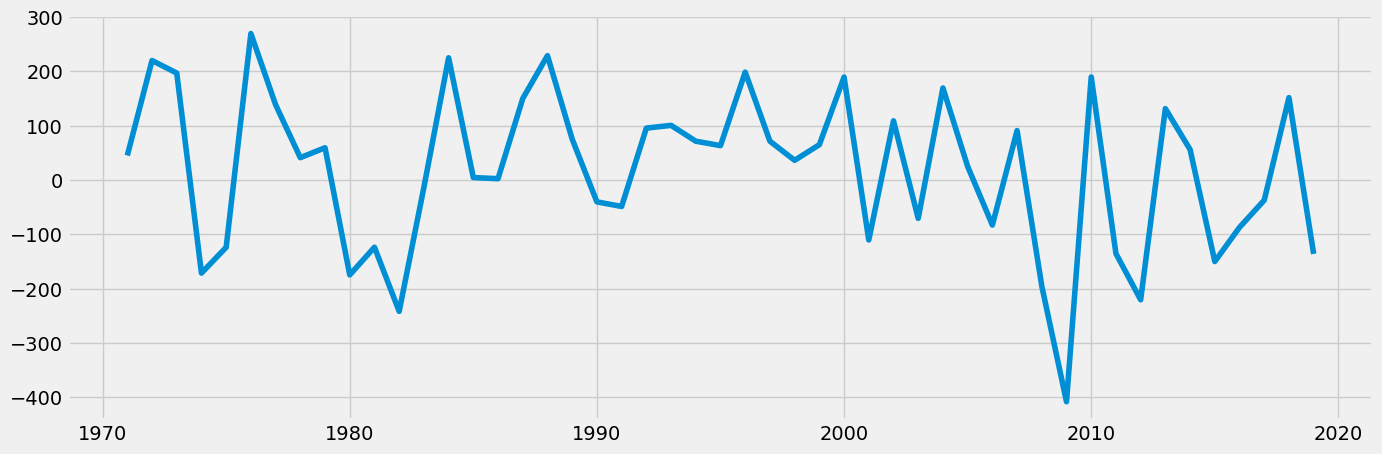

In [200]:
# Checking what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [201]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.477603
p-value                         0.008581
Number of Lags Used             2.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


This worked! The data is now stationary, as I can tell from the Dickey-Fuller test. Because the test statistics at -3.477 is smaller than the Critical Value at both the 5% and 10% significance levels, I must reject the null hypothesis. This means I can accept the alternative hypothesis - that this is stationary. I also see a satisfactory p-value since 0.008581<0.05. I cannot reject the null hypothesis at 1%, so if I was aiming for that level of significance I would conduct another Stationarizing step, maybe using log transformations this time.

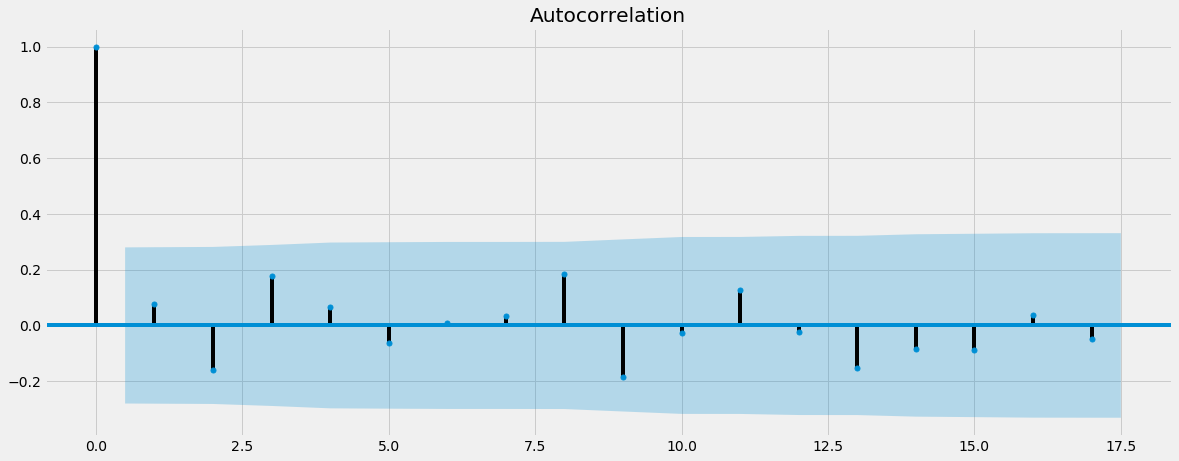

In [202]:
plot_acf(data_diff)
plt.show()

The autocorrelation plot has improved significantly though it still isn't perfect; it has one autocorrelated term. This means that even though the Dickey-Fuller test confirms staionarity, it is not strong. Because of the thought that I would need 10 significant lines for a second round of differencing, I will not do another round.

# THE END!